## Hardwork Pays Off
### Predicting Exam Scores using Machine Learning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

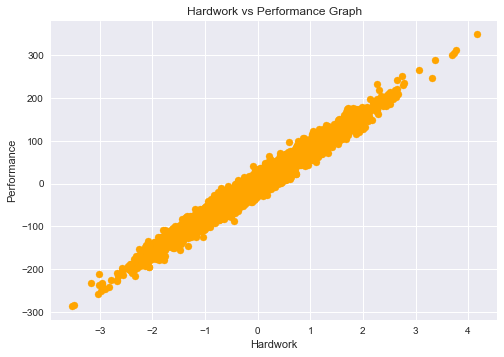

In [2]:
# Load and Visualise the Data

# Load
X = pd.read_csv('./Linear_X_Train.csv')
y = pd.read_csv('./Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X_train = X.values
y_train = y.values

# Normalization
u = X_train.mean()
s = X_train.std()
X_train = (X_train-u)/s

# Visualise
plt.style.use('seaborn')
plt.scatter(X_train, y_train, color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [3]:
# Linear Regression Algorithm

def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        grad[0] += (y_ - Y[i])
        grad[1] += (y_ - Y[i])*X[i]
    return grad / m

def error(X, Y, theta):
    m = X.shape[0]
    total_err = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_err += (y_ - Y[i])**2
    return total_err / m
    

def gradientDescent(X, Y, max_itr=100, l_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_itr):
        # Compute grad
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        
        #Update theta
        theta[0] = theta[0] - l_rate*grad[0]
        theta[1] = theta[1] - l_rate*grad[1]
        
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta, theta_list, error_list

theta [ 0.6838508  79.90361453]


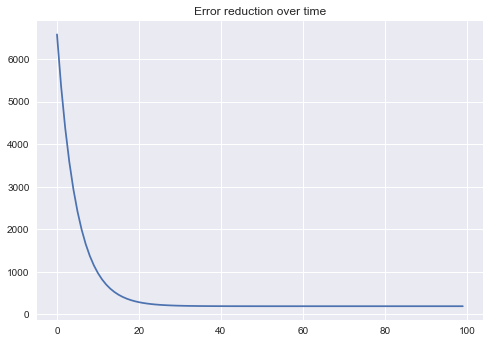

In [4]:
# Trainig dataset

theta, theta_list, err_list = gradientDescent(X_train, y_train)

print('theta', theta)

plt.plot(err_list)
plt.title("Error reduction over time")
plt.show()

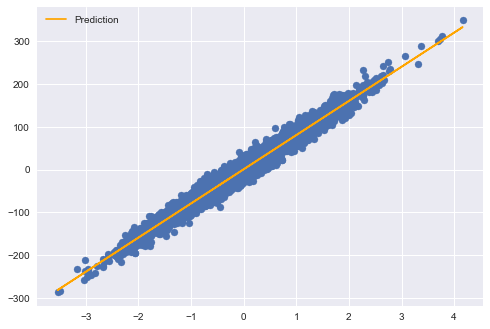

In [5]:
# Predictions and Best Line
y_ = hypothesis(X_train, theta)

# Plot training and predictions
plt.scatter(X_train, y_train)
plt.plot(X_train, y_, color='orange', label="Prediction")
plt.legend()
plt.show()

In [6]:
# Computing Score
# Score : R2 (R-Squared) or Coefficient of Determination

def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1- num/denom)
    return score*100

print('score', r2_score(y_train, y_))

score 97.09612226971643


In [7]:
# Predictions on test data

X_test = pd.read_csv('./Linear_X_Test.csv').values
y_test = hypothesis(X_test, theta)

df = pd.DataFrame(y_test, columns=["y"])
df.to_csv('y_pred.csv', index=False)